# Auto-encoders

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_regression
from matplotlib import pyplot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from tensorflow.examples.tutorials.mnist import mnist

Using TensorFlow backend.


In [3]:
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [158]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

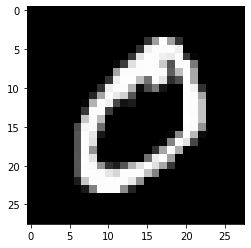

In [29]:
plt.imshow(X_train[1], cmap='gray')

In [159]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_test.shape

(10000, 784)

In [7]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# intermediate result
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='mse',metrics=['accuracy'] )

In [93]:
history =autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
               )
result = autoencoder.evaluate(X_test, X_test)

Epoch 1/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0235 - accuracy: 0.0119
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0232 - accuracy: 0.0121
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0230 - accuracy: 0.0120
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0228 - accuracy: 0.0121
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0225 - accuracy: 0.0121
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0223 - accuracy: 0.0121
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0221 - accuracy: 0.0120
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0218 - accuracy: 0.0117
Epoch 9/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0216 - accuracy: 0.0117
Epoch 10/50
60000/60000 [==============================

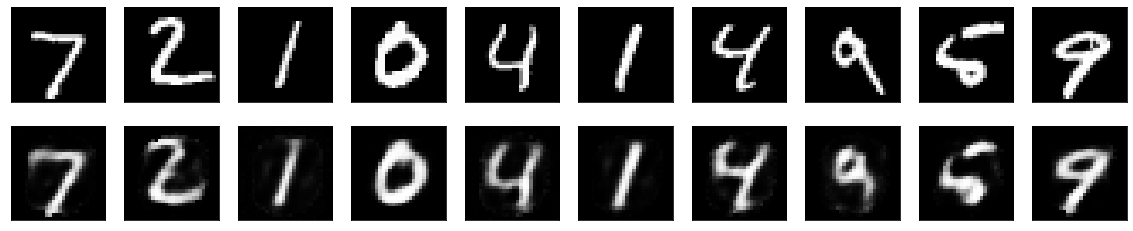

In [94]:
reconst_test = autoencoder.predict(X_test)
encode_test = encoder.predict(X_test)

n = 10
row = 2

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [34]:
reconst_test.shape

(10000, 784)

In [19]:
encode_test.shape

(10000, 32)

In [35]:
result

[0.023125287693738936, 0.009200000204145908]

Text(0.5, 1.0, 'Test accuracy: 2.3 %')

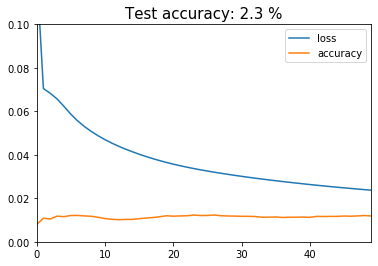

In [10]:
# execution 1
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot(ylim=(0,0.1))

plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15)

In [96]:
result

[0.014887031622231007, 0.01140000019222498]

Text(0.5, 1.0, 'Test accuracy: 1.5 %')

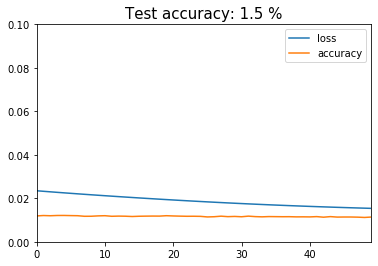

In [95]:
# execution 2
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot(ylim=(0,0.1))

plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15)